## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of examining and summarizing a dataset to understand its main characteristics, detect patterns, spot anomalies, and formulate hypotheses using visual and statistical methods. Some of the key steps in EDA are:
1. Understanding the Data
2. Summarizing the Data
3. Handling Missing and Outlier Values
4. Visualizing Data
5. Feature Engineering & Transformation
6. Detecting Patterns & Insights

Importance of EDA are as follows:
1. Detects errors & missing values before modeling.
2. Provides insights that help shape feature selection.
3. Guides model selection and preprocessing strategies.
4. Enhances data understanding, leading to better decision-making.

In this notebook, we perform Exploratory Data Analysis(EDA) on flight delay data obtained from American Bureau of Transportation Statistics. This dataset contains information about on-time performance and delay statistics of flights in the US, spanning multiple years and divided by airport, carrier, and delay reason.

In [2]:
#import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data location
column_definition_path="./Data/column_definitions.xlsx"
airline_data_path="./Data/DS_airline_delay_causes.csv"

#import data to dataframes
flight_data_df=pd.read_csv(airline_data_path)
column_definition_df=pd.read_excel(column_definition_path)

In [4]:
#displaying first five rows
print("Displaying first five rows of Flight data")
flight_data_df.head()

Displaying first five rows of Flight data


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0,NaN
1,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0,NaN
2,2009,11,AS,Alaska Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",66.0,6.0,1.28,0.69,...,0.00,0.0,0.0,176.0,64.0,11.0,101.0,0.0,0.0,NaN
3,2009,11,AS,Alaska Airlines Inc.,EWR,"Newark, NJ: Newark Liberty International",59.0,10.0,0.24,0.00,...,0.56,0.0,0.0,553.0,8.0,0.0,526.0,0.0,19.0,NaN
4,2009,11,AS,Alaska Airlines Inc.,HNL,"Honolulu, HI: Daniel K Inouye International",85.0,18.0,1.34,1.46,...,0.00,0.0,0.0,547.0,85.0,89.0,373.0,0.0,0.0,NaN


In [5]:
print("Displaying first five rows of Column Definitions data")
column_definition_df.head(22)

Displaying first five rows of Column Definitions data


,Column,Description
0,year,Year
1,month,Month
2,carrier,Two character designator for the carrier
3,carrier_name,Full carrier name
4,airport,IATA airport code
5,airport_name,Full airport name
6,arr_flights,The total number of arriving flights for the c...
7,arr_del15,The number of arriving flights that were delay...
8,carrier_ct,The number of arriving flights delayed due to ...
9,weather_ct,The number of arriving flights delayed due to ...


So, based on the visualising the first 5 columnns of both the dataframes, we can observe that one dataframe contains the flight data and the other contains the column definitions. So, for more exploration we just consider the dataframe containing flight data.


In [6]:
#getting basic info of the flight data 
flight_data_df.info()

#getting count of number of features and number of data samples
Original_features=flight_data_df.shape[1]
Original_Columns= flight_data_df.shape[0]
print(f"Number of Features:{flight_data_df.shape[1]}")
print(f"Number of Data Samples:{flight_data_df.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73282 entries, 0 to 73281
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 73282 non-null  int64  
 1    month               73282 non-null  int64  
 2   carrier              73282 non-null  object 
 3   carrier_name         73282 non-null  object 
 4   airport              73282 non-null  object 
 5   airport_name         73282 non-null  object 
 6   arr_flights          73240 non-null  float64
 7   arr_del15            73211 non-null  float64
 8   carrier_ct           73240 non-null  float64
 9    weather_ct          73240 non-null  float64
 10  nas_ct               73240 non-null  float64
 11  security_ct          73240 non-null  float64
 12  late_aircraft_ct     73240 non-null  float64
 13  arr_cancelled        73240 non-null  float64
 14  arr_diverted         73240 non-null  float64
 15   arr_delay           73240 non-null 

The total number of features in the dataset is 22 and the number of data samples is 73282 and the data types available in the dataset are: float64(16), int64(2), object(4).

Now, we search for missing values in the dataset.

In [7]:
# Count missing values per column
missing_values = flight_data_df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
year                       0
 month                     0
carrier                    0
carrier_name               0
airport                    0
airport_name               0
arr_flights               42
arr_del15                 71
carrier_ct                42
 weather_ct               42
nas_ct                    42
security_ct               42
late_aircraft_ct          42
arr_cancelled             42
arr_diverted              42
 arr_delay                42
 carrier_delay            42
weather_delay             42
nas_delay                 42
security_delay            42
late_aircraft_delay       42
Unnamed: 21            73282
dtype: int64


Based on the observation, it looks the colummn **Unnamed: 21** has null values equivalent to the size of the dataset. So this feature doesn't contain any crucial information and should be dropped. Whereas, 16/22(including Unnamed: 21) features have missing values. So the samples with missing values can be dropped as we have sufficient amount of data samples.

In [8]:
#Removing Unnamed: 21 feature
flight_data_df.drop('Unnamed: 21', axis=1, inplace=True)

#Removing Samples with missing values
flight_data_df.dropna(inplace=True)

#getting count of number of features and number of data samples after removing missing data samples and columns
print(f"Number of Features:{flight_data_df.shape[1]}")
print(f"Number of Data Samples:{flight_data_df.shape[0]}\n")

Features_aftermissing=flight_data_df.shape[1]
rows_aftermissing=flight_data_df.shape[0]
rows_removed_missing=Original_Columns-flight_data_df.shape[0]
features_removed= Original_features-flight_data_df.shape[1]
#Count of Columns and features removed
print(f"Number of Features Removed:{Original_features-flight_data_df.shape[1]}")
print(f"Number of Data Samples Removed:{Original_Columns-flight_data_df.shape[0]}")

#we observe space between some features, we remove them
flight_data_df.rename(columns=lambda x: x.lstrip() if x.startswith(' ') else x, inplace=True)

Number of Features:21
Number of Data Samples:73211

Number of Features Removed:1
Number of Data Samples Removed:71


So, finally the feature `Unnamed: 21` is dropped and the 71 rows with missing values are dropped. Now we try to find duplicate data samples.

In [9]:
#check for duplicate data samples
duplicates = flight_data_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}\n")

#dropping duplicate rows
flight_data_df.drop_duplicates(inplace=True)

Features_afterduplicates=flight_data_df.shape[1]
rows_afterduplicates=flight_data_df.shape[0]

#getting count of number of features and number of data samples after removing duplicate data samples
print(f"Number of Features:{flight_data_df.shape[1]}")
print(f"Number of Data Samples:{flight_data_df.shape[0]}\n")


Number of duplicate rows: 0

Number of Features:21
Number of Data Samples:73211



Now, we visualise the data and features using Pie Chart. As 71 rows were removed and 0 data samples were found to be duplicate. So 0.1% of the Original dataset was removed and 95.5% of the features remain as they all contain important information.

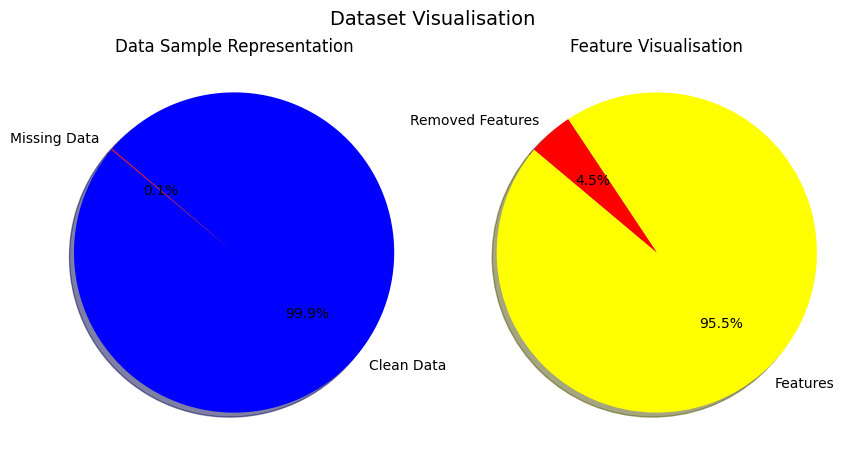

In [18]:
total_samples=73282
# Data to plot
labels_1 = ['Clean Data', 'Missing Data']
sizes_1 = [rows_afterduplicates,  rows_removed_missing]  # Percentages or values
colors_1 = ['Blue', 'Red']

# Data to plot
labels_2 = ['Features', 'Removed Features']
sizes_2 = [Features_afterduplicates,  features_removed]  # Percentages or values
colors_2 = ['Yellow', 'Red']

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Dataset Visualisation', fontsize=14)

axes[0].pie(sizes_1, labels=labels_1, colors=colors_1, autopct='%1.1f%%', shadow=True, startangle=140)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Data Sample Representation')

axes[1].pie(sizes_2, labels=labels_2, colors=colors_2, autopct='%1.1f%%', shadow=True, startangle=140)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Feature Visualisation')

plt.tight_layout
plt.show()

In [ ]:
#getting summary of numerical columns
flight_data_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,994.259606,191.557594,46.935397,6.170249,74.565059,0.430687,63.456257,18.667072,2.306252,11339.752879,3060.529715,528.189234,3593.917909,17.302181,4139.806887
std,5.081828,3.446720,1855.244965,362.768908,80.798703,16.566612,162.986690,1.406470,135.453333,69.366322,7.277573,23124.803113,6160.159482,1505.819654,9062.820901,63.395679,8987.968516
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,4.000000,124.000000,24.000000,7.520000,0.000000,7.750000,0.000000,4.360000,0.000000,0.000000,1218.000000,375.000000,0.000000,289.000000,0.000000,247.000000
50%,2011.000000,7.000000,331.000000,68.000000,19.930000,1.400000,23.900000,0.000000,15.760000,3.000000,0.000000,3582.000000,1080.000000,91.000000,952.000000,0.000000,997.000000
75%,2016.000000,10.000000,867.000000,175.000000,48.420000,5.400000,66.060000,0.090000,51.335000,12.000000,2.000000,9932.000000,2837.000000,425.000000,2880.000000,4.000000,3431.000000
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


Some observations from the numerical data(Including both integer and float) from above:
1. Columns "nas_ct"(The number of arriving flights delayed due to national air system issues) and "nas_delay"(The total number of delay minutes due to  national air system issues) has negative minimum value, which seems suspicious this could be due to the following reasons:
    * Data Processing or Reporting Errors.
    * Adjustments or Corrections in Delay Calculations.
    * Negative Values Due to Rescheduling
    * Incorrect Data Transformation
    we correct this error by replacing them with 0.
2. The delayed flights features have exceptionally high standard deviation, which indicates skewed distribution, caused by certain special circumstances(can be visualised by the maximum value). Similar behaviour shown by "arr_cancelled" feature.

We focus on removing the negative values from the features `nas_ct` and `nas_delay` using the following code:


In [ ]:
# Replace negative values in nas_ct and nas_delay with 0
flight_data_df["nas_ct"] = flight_data_df["nas_ct"].apply(lambda x: max(x, 0))
flight_data_df["nas_delay"] = flight_data_df["nas_delay"].apply(lambda x: max(x, 0))

# Verify if any negative values remain
negative_values_check = flight_data_df[(flight_data_df["nas_ct"] < 0) | (flight_data_df["nas_delay"] < 0)]

# Display confirmation message
negative_values_check.shape[0]

0

We now check if there are any negative values.

In [ ]:
#check again the summary
flight_data_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,994.259606,191.557594,46.935397,6.170249,74.565059,0.430687,63.456257,18.667072,2.306252,11339.752879,3060.529715,528.189234,3593.918182,17.302181,4139.806887
std,5.081828,3.446720,1855.244965,362.768908,80.798703,16.566612,162.986690,1.406470,135.453333,69.366322,7.277573,23124.803113,6160.159482,1505.819654,9062.820792,63.395679,8987.968516
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,4.000000,124.000000,24.000000,7.520000,0.000000,7.750000,0.000000,4.360000,0.000000,0.000000,1218.000000,375.000000,0.000000,289.000000,0.000000,247.000000
50%,2011.000000,7.000000,331.000000,68.000000,19.930000,1.400000,23.900000,0.000000,15.760000,3.000000,0.000000,3582.000000,1080.000000,91.000000,952.000000,0.000000,997.000000
75%,2016.000000,10.000000,867.000000,175.000000,48.420000,5.400000,66.060000,0.090000,51.335000,12.000000,2.000000,9932.000000,2837.000000,425.000000,2880.000000,4.000000,3431.000000
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


Works!

Now we visualise the categorical columns. And observe a discrepancy as number of carrier and carrier_names are not equal. We will fix it later.

In [ ]:
#getting summary of categorical columns
flight_data_df.describe(include="object")

,carrier,carrier_name,airport,airport_name
count,73211,73211,73211,73211
unique,28,32,30,30
top,DL,Delta Air Lines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County"
freq,6289,6289,2806,2806


There are 4 categorical features. Now, we visualise the summary of the above in a graphical format.

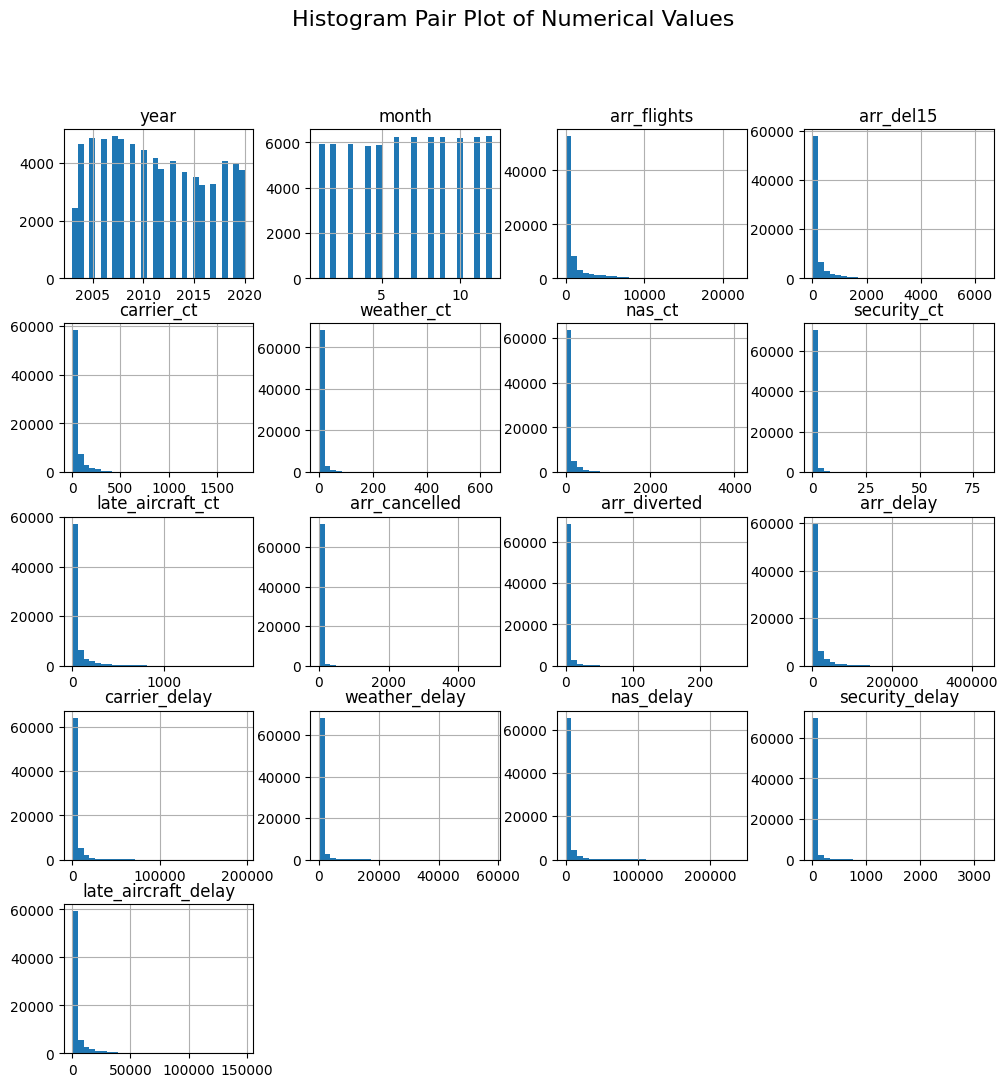

In [19]:
#Analysing numerical values and visulising outliers
flight_data_df.hist(figsize=(12, 12), bins=30)
plt.suptitle("Histogram Pair Plot of Numerical Values",fontsize=16)
plt.show()

This is a histogram matrix (pair plot) for numerical variables in the airline delay dataset. Each subplot represents the distribution of a specific numeric variable, providing insights into the spread and skewness of the data. Following are some of the observations from the graph above:

1. **Time-Based Variables (Year, Month)**:
    * "Year" Histogram: Shows the distribution of flight records over different years.The number of records fluctuates over time, with a noticeable drop in recent years.
    * "Month" Histogram: Displays a fairly uniform distribution, indicating that flight records are evenly spread across all months.

2. **Flight Operations Variables (arr_flights, arr_del15, arr_cancelled, arr_diverted)**:

    * "arr_flights" (Total Arriving Flights): Right-skewed, meaning most airports have relatively few flights, while a few have very high traffic.
    * "arr_del15" (Delayed Flights ≥ 15 mins): Also right-skewed, indicating that most records have fewer delays, but a few have a very high number.
    * "arr_cancelled" & "arr_diverted" (Cancellations & Diversions): Majority of the records have very low values (close to 0), but some outliers exist with significantly high cancellations or diversions.

3. **Delay Cause Variables (carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct)**: All show right-skewed distributions as most flights have minimal delay occurrences. A few flights have very high delays, appearing as outliers.

4. **Delay Duration Variables (arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay)**:Extremely right-skewed distributions.
This suggests that while most flights experience small delays, some flights have massive delays, creating long tails in the distributions.

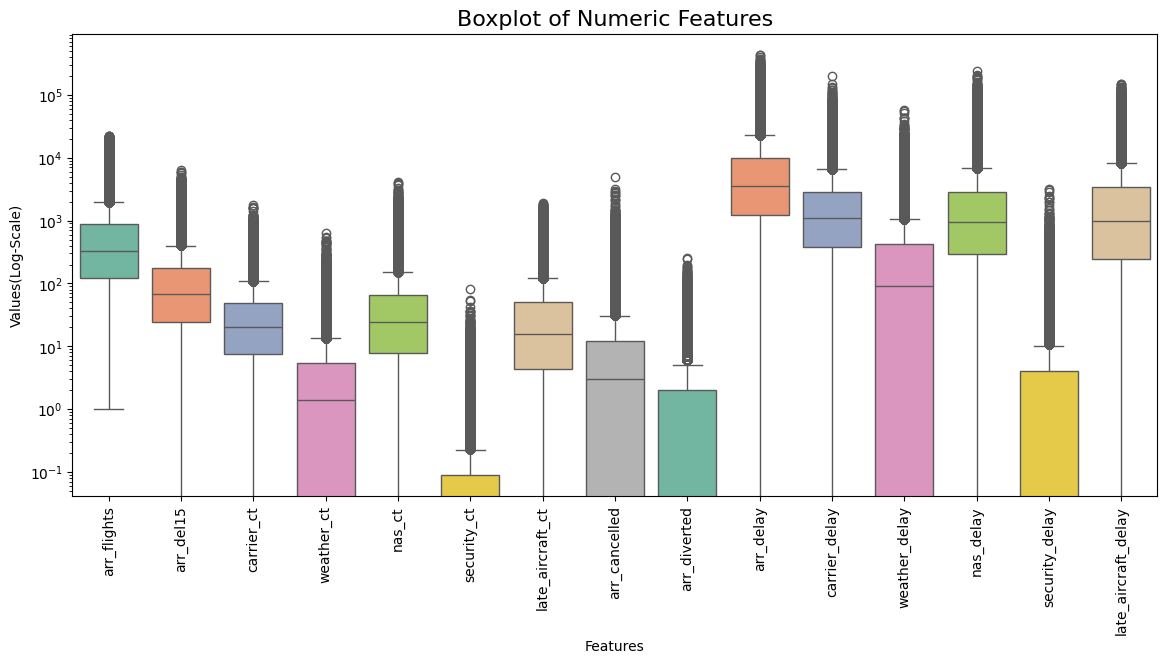

In [20]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=flight_data_df.select_dtypes(include=['float64']),palette="Set2", showfliers=True)
plt.xticks(rotation=90)
plt.yscale("log") 
plt.ylabel("Values(Log-Scale)")
plt.xlabel("Features")
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.show()


This is a box plot visualization of float flight delay-related features(the grey circles represents outlier), with values represented on a logarithmic scale. Some of the observations are as follows:

1. Flight Operations (arr_flights, arr_del15, arr_cancelled, arr_diverted):
    a. arr_flights (Total Arrival Flights) has a wide spread, meaning the number of arriving flights varies significantly across airports and carriers.
    b. arr_del15 (Delayed Flights ≥ 15 mins) shows some outliers, but the spread is more contained than total arrivals.
    c. arr_cancelled and arr_diverted have many extreme outliers, showing that flight cancellations and diversions are rare but sometimes extreme.

2. Delay Causes (carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct):
    a. All delay causes are right-skewed, meaning most flights experience minimal delays, but a few flights have very high delays.
    b. Security delays (security_ct) are the smallest in scale, indicating they contribute the least to total delays.

3. Total Delay Duration (arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay):
    a. arr_delay (Total Arrival Delay) has significant outliers, meaning a few flights experience massive delays.
    b. weather_delay is highly skewed, showing that while most weather-related delays are small, some are extreme.
    c. late_aircraft_delay and carrier_delay have a large spread, suggesting these are major contributors to flight delays.

Though we observe large number of outliers, but they remain in the data as they seem quite possible in the aviation industry.


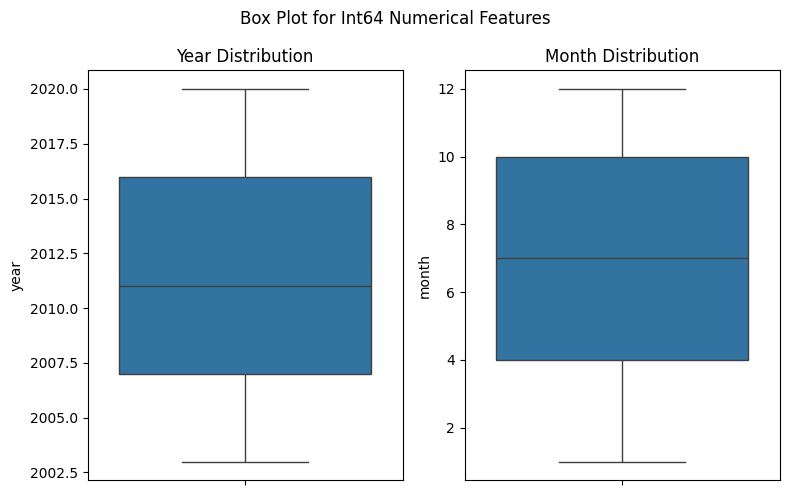

In [26]:
#we are aware int64 has only two features year and 
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle("Box Plot for Int64 Numerical Features")

# First boxplot for 'year'
sns.boxplot(data=flight_data_df['year'], ax=axes[0])
axes[0].set_title('Year Distribution')

# Second boxplot for 'month'
sns.boxplot(data=flight_data_df['month'], ax=axes[1])
axes[1].set_title('Month Distribution')

# Adjust layout and display
plt.tight_layout()
plt.show()

We now analysis the int64 datatype which are represented by two features year and month. Features are as follows:
1. Year: The dataset spans from 2003 to 2020. The median year is around 2010-2011, meaning half of the records are before this and half are after. The data is evenly distributed across the years, as indicated by the symmetrical box.
2. Month: The dataset covers all 12 months of the year. The median month is around July, meaning half of the records are before July and half are after.The data appears evenly spread across all months, as indicated by the symmetrical box.

Now we analyse the categorical features.

In [ ]:
# Count unique values in each categorical column
flight_data_df.select_dtypes(include=['object']).nunique()

carrier         28
carrier_name    32
airport         30
airport_name    30
dtype: int64

In [ ]:
#mapping aiport to airport_name
airport_name_mapping = flight_data_df.groupby('airport')['airport_name'].unique().reset_index()
print(airport_name_mapping)

   airport                                       airport_name
0      ATL  [Atlanta, GA: Hartsfield-Jackson Atlanta Inter...
1      BOS                  [Boston, MA: Logan International]
2      BWI  [Baltimore, MD: Baltimore/Washington Internati...
3      CLT   [Charlotte, NC: Charlotte Douglas International]
4      DCA  [Washington, DC: Ronald Reagan Washington Nati...
5      DEN                 [Denver, CO: Denver International]
6      DFW  [Dallas/Fort Worth, TX: Dallas/Fort Worth Inte...
7      DTW          [Detroit, MI: Detroit Metro Wayne County]
8      EWR         [Newark, NJ: Newark Liberty International]
9      FLL  [Fort Lauderdale, FL: Fort Lauderdale-Hollywoo...
10     HNL      [Honolulu, HI: Daniel K Inouye International]
11     IAD  [Washington, DC: Washington Dulles International]
12     IAH  [Houston, TX: George Bush Intercontinental/Hou...
13     JFK      [New York, NY: John F. Kennedy International]
14     LAS            [Las Vegas, NV: McCarran International]
15     L

We observe that the feature `carrier` and `carrier_name` should have same number of unique categories.Lets investigate this.

In [ ]:
carrier_name_mapping = flight_data_df.groupby('carrier')['carrier_name'].unique().reset_index()
print(carrier_name_mapping)

   carrier                                       carrier_name
0       9E        [Pinnacle Airlines Inc., Endeavor Air Inc.]
1       AA                           [American Airlines Inc.]
2       AQ                              [Aloha Airlines Inc.]
3       AS                             [Alaska Airlines Inc.]
4       B6                                  [JetBlue Airways]
5       CO                       [Continental Air Lines Inc.]
6       DH        [Atlantic Coast Airlines, Independence Air]
7       DL                             [Delta Air Lines Inc.]
8       EV  [Atlantic Southeast Airlines, ExpressJet Airli...
9       F9                           [Frontier Airlines Inc.]
10      FL                      [AirTran Airways Corporation]
11      G4                                    [Allegiant Air]
12      HA                           [Hawaiian Airlines Inc.]
13      HP                       [America West Airlines Inc.]
14      MQ          [American Eagle Airlines Inc., Envoy Air]
15      

We observe the following:
* carrier `9E` belongs Pinnacle Airlines Inc. but was rebranded as Endeavor Air Inc. 
* `MQ` was American Eagle Airlines Inc., which later rebranded as Envoy Air. 
* `EV` represents both Atlantic Southeast Airlines and ExpressJet Airlines, which were merged but continued using the same carrier code.
* `DH` was initially Atlantic Coast Airlines, which rebranded as Independence Air before ceasing operations.
* `OH` represents both Comair Inc. and PSA Airlines Inc., as PSA Airlines may have taken over operations from Comair.

We aim to standardise the naming to avoid redundancy of data and create a standardisation function through which we update the update the `carrier_name` based on the last update.


In [ ]:
# Sorting the dataset by year to ensure the latest carrier name is selected
df_sorted = flight_data_df.sort_values(by='year', ascending=True)

# Creating a mapping of carrier codes to their most recent carrier name
carrier_standardized_mapping = df_sorted.groupby('carrier')['carrier_name'].last().to_dict()

# Apply the mapping to the dataset to standardize the carrier names
flight_data_df['carrier_name'] = flight_data_df['carrier'].map(carrier_standardized_mapping)

In [ ]:
#now we check if the error is resolve
# Count unique values in each categorical column
flight_data_df.select_dtypes(include=['object']).nunique()

carrier         28
carrier_name    27
airport         30
airport_name    30
dtype: int64

Still we notice, that the values are not same. Lets map them again.

In [ ]:
carrier_name_mapping = flight_data_df.groupby('carrier')['carrier_name'].unique().reset_index()
print(carrier_name_mapping)

   carrier                   carrier_name
0       9E            [Endeavor Air Inc.]
1       AA       [American Airlines Inc.]
2       AQ          [Aloha Airlines Inc.]
3       AS         [Alaska Airlines Inc.]
4       B6              [JetBlue Airways]
5       CO   [Continental Air Lines Inc.]
6       DH             [Independence Air]
7       DL         [Delta Air Lines Inc.]
8       EV      [ExpressJet Airlines LLC]
9       F9       [Frontier Airlines Inc.]
10      FL  [AirTran Airways Corporation]
11      G4                [Allegiant Air]
12      HA       [Hawaiian Airlines Inc.]
13      HP   [America West Airlines Inc.]
14      MQ                    [Envoy Air]
15      NK             [Spirit Air Lines]
16      NW      [Northwest Airlines Inc.]
17      OH            [PSA Airlines Inc.]
18      OO        [SkyWest Airlines Inc.]
19      RU     [ExpressJet Airlines Inc.]
20      TZ       [ATA Airlines d/b/a ATA]
21      UA        [United Air Lines Inc.]
22      US              [US Airway

We notice that ExpressJet Airlines Inc. has two carrier code "XE" and "RU". ExpressJet historically had two carrier codes because it operated under different identities at various points in its history, sometimes operating as a separate entity and sometimes as a subsidiary of another airline, leading to the use of different codes depending on the operating arrangement at the time. To avoid confusion, we rename the carrier_name to include code to avoid loss of data.

In [ ]:
# Identifying which carrier codes map to "ExpressJet Airlines Inc."
expressjet_carriers = flight_data_df[flight_data_df['carrier_name'] == "ExpressJet Airlines Inc."]['carrier'].unique()

# Updating carrier names to ensure uniqueness by appending carrier codes
for carrier in expressjet_carriers:
    flight_data_df.loc[flight_data_df['carrier'] == carrier, 'carrier_name'] = f"ExpressJet Airlines Inc. ({carrier})"

#now we check if the error is resolve
# Count unique values in each categorical column
flight_data_df.select_dtypes(include=['object']).nunique()

carrier         28
carrier_name    28
airport         30
airport_name    30
dtype: int64

Now it seems balanced and we check the final mapping.

In [ ]:
#checking the final mapping
carrier_name_mapping = flight_data_df.groupby('carrier')['carrier_name'].unique().reset_index()
print(carrier_name_mapping)

   carrier                     carrier_name
0       9E              [Endeavor Air Inc.]
1       AA         [American Airlines Inc.]
2       AQ            [Aloha Airlines Inc.]
3       AS           [Alaska Airlines Inc.]
4       B6                [JetBlue Airways]
5       CO     [Continental Air Lines Inc.]
6       DH               [Independence Air]
7       DL           [Delta Air Lines Inc.]
8       EV        [ExpressJet Airlines LLC]
9       F9         [Frontier Airlines Inc.]
10      FL    [AirTran Airways Corporation]
11      G4                  [Allegiant Air]
12      HA         [Hawaiian Airlines Inc.]
13      HP     [America West Airlines Inc.]
14      MQ                      [Envoy Air]
15      NK               [Spirit Air Lines]
16      NW        [Northwest Airlines Inc.]
17      OH              [PSA Airlines Inc.]
18      OO          [SkyWest Airlines Inc.]
19      RU  [ExpressJet Airlines Inc. (RU)]
20      TZ         [ATA Airlines d/b/a ATA]
21      UA          [United Air 

/tmp/ipykernel_56916/2217488979.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(carrier_counts['label'],rotation=90)
/tmp/ipykernel_56916/2217488979.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(airport_counts['label'],rotation=90)


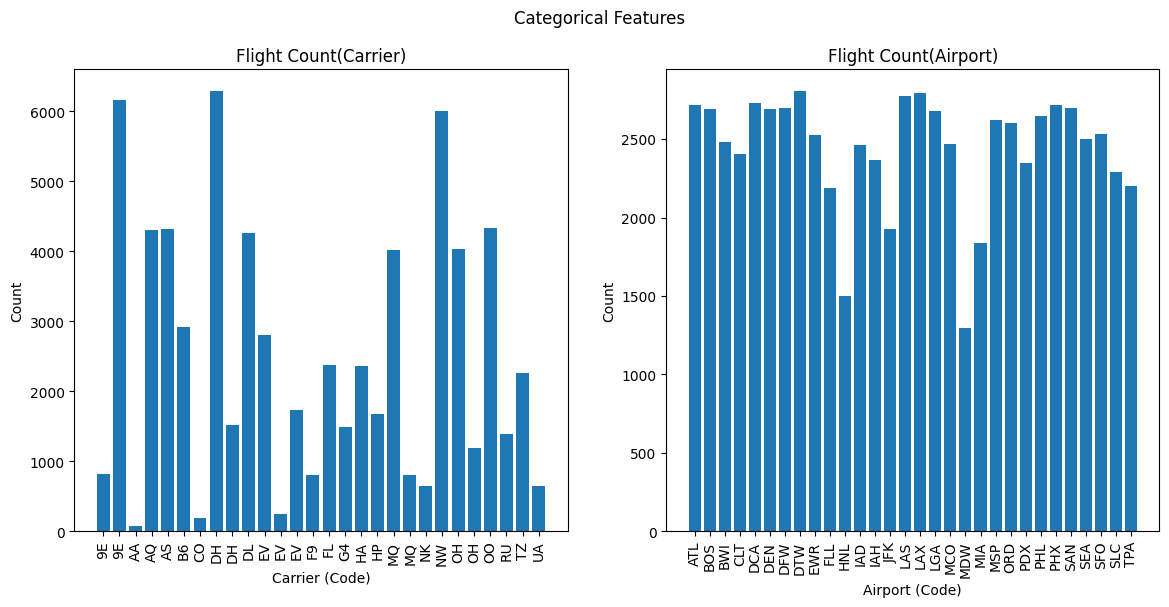

In [32]:
# Countplot for a categorical column 
carrier_counts = flight_data_df.groupby(['carrier', 'carrier_name']).size().reset_index(name='count')
airport_counts = flight_data_df.groupby(['airport', 'airport_name']).size().reset_index(name='count')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Categorical Features")
# Create labels combining carrier code and name for the plot
#carrier_counts['label'] = carrier_counts['carrier'] + " - " + carrier_counts['carrier_name'] #for longer labels
carrier_counts['label'] = carrier_counts['carrier'] 
#carrier_counts['label'] = carrier_counts['airport'] + " - " + carrier_counts['airport_name']
airport_counts['label'] = airport_counts['airport'] 

# Plot the updated graph 
axes[0].bar(carrier_counts['label'], carrier_counts['count'])
axes[0].set_xticklabels(carrier_counts['label'],rotation=90)
axes[0].set_xlabel("Carrier (Code)")
axes[0].set_ylabel("Count")
axes[0].set_title("Flight Count(Carrier)")

axes[1].bar(airport_counts['label'], airport_counts['count'])
axes[1].set_xticklabels(airport_counts['label'],rotation=90)
axes[1].set_xlabel("Airport (Code)")
axes[1].set_ylabel("Count")
axes[1].set_title("Flight Count(Airport)")

plt.show()

This figure contains two bar charts side by side, labeled under the title "Categorical Features", which compare flight counts based on different categorical variables.

*   **Flight Count By Carrier**: Also represents the most busiest airlines in the US aviation. The x-axis represents different carrier codes (e.g., 9E, AA, AS, DL, etc.).The y-axis represents the count of flights for each carrier.The height of each bar indicates the total number of flights operated by that carrier. Some carriers have significantly more flights than others, indicating a major presence in the airline industry such as 9E,DH,NW and OO. Smaller airlines have significantly fewer flights, possibly indicating they are regional or low-cost carriers.

*  **Flight Count By Airport**: Also represents the most busiest airlines in the US aviation. The x-axis represents different airport codes (e.g., ATL, BOS, DFW, LAX, etc.).The y-axis represents the count of flights for each airport. The height of each bar indicates the total number of flights recorded at each airport. Some airports handle more flights than others, which suggests they are major hubs in the air traffic network such as ATL, FDW,DTW. The spread of flight counts across different airports indicates the variability in air traffic density among airports.

Now since we have analysed the clean dataset. lets dive into the various kinds of Feature categories based on:

1. Total Delay Duration (arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay)
2. Delay Causes (arr_del15,carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct)
3. Flight Operations (arr_flights, arr_cancelled, arr_diverted)


## Total Delay Duration Feature Analysis

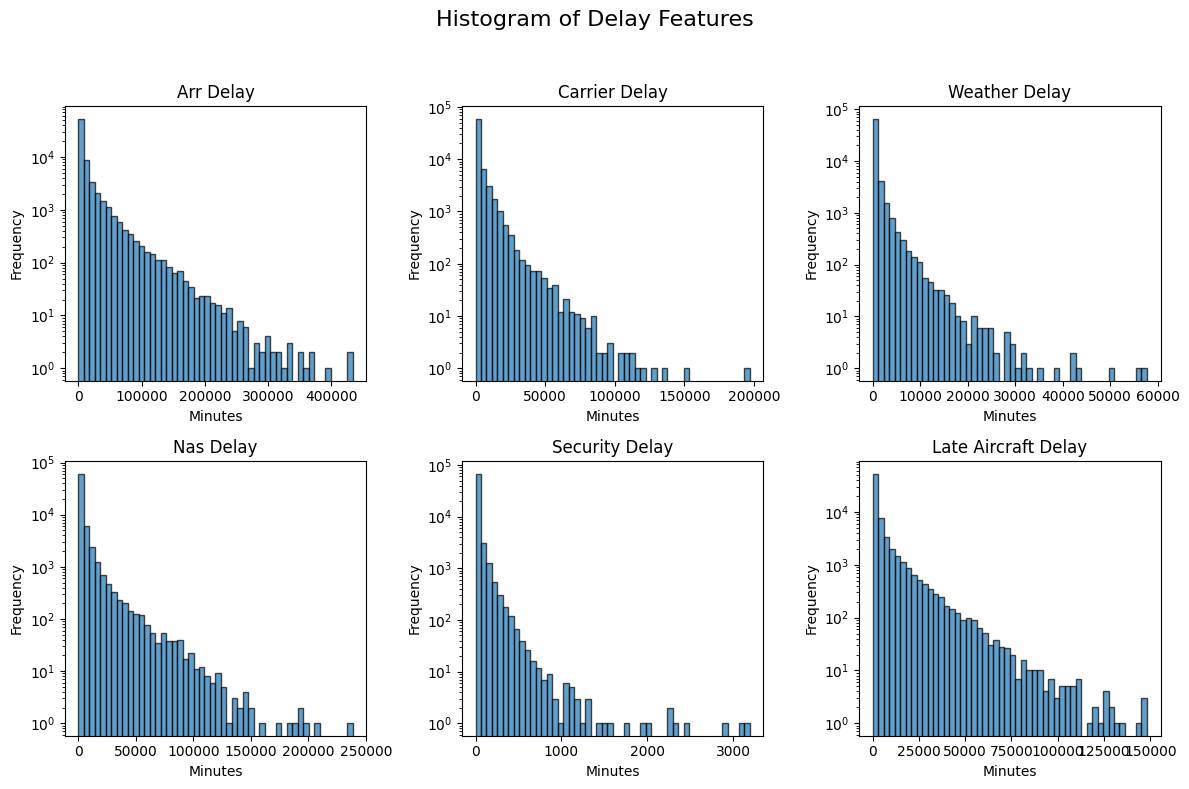

In [ ]:
#Delay Analysis

# Select delay-related columns for visualization
delay_columns = ["arr_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

# Plot histograms for delay distributions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(delay_columns):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    ax.hist(flight_data_df[col], bins=50, edgecolor='black', alpha=0.7)
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel("Minutes")
    ax.set_ylabel("Frequency")
    ax.set_yscale("log")  # Log scale to handle skewness

# Add main title
fig.suptitle("Histogram of Delay Features", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title
plt.show()

This figure contains six histograms, each representing the distribution of delay times for different causes of airline delays. X-axis represents the delay time in minutes for each delay category. Y-axis represents how often a delay of a particular duration occurs and the logarithmic scale (base 10) helps visualize the skewed nature of delays, where most delays are short, but some are very long. Some of the observations from each histogram are summarised as follows:

1. Arr Delay(Arrival Delay): Most flights experience short arrival delays, but some extreme cases go beyond 400,000 minutes (potentially due to data errors or extreme disruptions).

2. Carrier Delay: Delays caused by airline operations (e.g., maintenance, crew shortages). Most are short, but some exceed 150,000 minutes, showing a long tail distribution.

3. Weather Delay: Caused by bad weather (storms, fog, snow, etc.). Usually shorter than other delays, but some extreme cases exist.

4. NAS Delay(National Aviation System): Includes air traffic control delays, congestion, and security protocols. Similar pattern to other delay types but often shorter than carrier delays.

5. Security Delay: Includes security-related incidents, screenings, and lockdowns. Smallest delays overall, rarely exceeding 3,000 minutes.

6. Late Aircraft Delay:Delays caused by late incoming aircraft affecting subsequent flights. Some of the longest delays, exceeding 150,000 minutes in extreme cases.

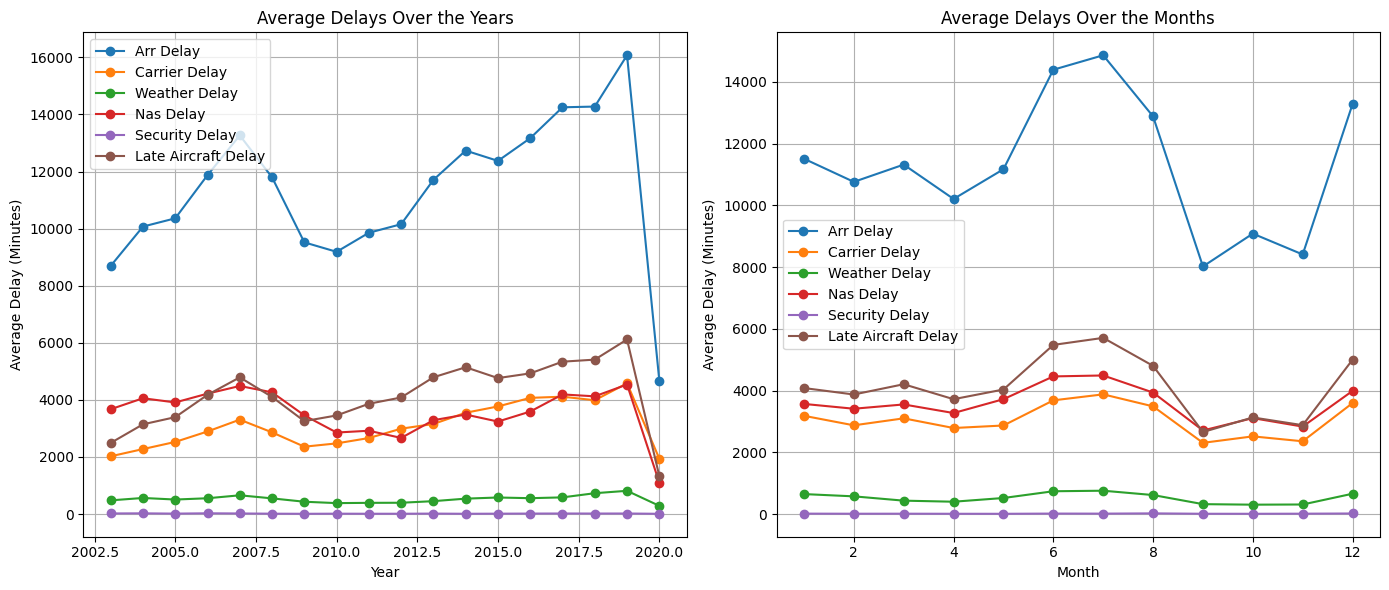

In [52]:
# Group data by year and calculate mean delays
yearly_delays = flight_data_df.groupby("year")[delay_columns].mean()

# Group data by year and calculate mean delays
monthly_delays = flight_data_df.groupby("month")[delay_columns].mean()

# Create subplots for year and month trends
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot trends over year
for col in delay_columns:
    axes[0].plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[0].set_title("Average Delays Over the Years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average Delay (Minutes)")
axes[0].legend()
axes[0].grid(True)

# Plot trends over month
for col in delay_columns:
    axes[1].plot(monthly_delays.index, monthly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[1].set_title("Average Delays Over the Months")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Average Delay (Minutes)")
axes[1].legend()
axes[1].grid(True)

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the combined figure
plt.tight_layout()
plt.show()

The above graph represents the Yearly Treand(2003-2020) and Seasonal Trends(Jan-Dec) affecting the various delay features. The X axis represents the Year(left Curve) and Month(right Curve) and The Y axis represents the delay in minutes. Some of the observations are:

* Arrival Delay (Blue Line): The most significant trend, gradually increasing over the years, peaking around 2020, and then dropping suddenly.
* Late Aircraft Delay (Brown Line): Shows a similar increasing trend, indicating that late arrivals impact future flights.
* Carrier Delay (Orange Line): Also increases but at a lower rate.
* NAS Delay (Red Line): Shows fluctuations, likely due to changes in air traffic control efficiency or airport congestion.
* Security Delay (Purple Line): Remains low and stable, meaning security-related delays have minimal impact over time.
* Weather Delay (Green Line): Slight increase over time, but remains relatively low compared to other types of delays.

The delay trend consistently follows a upward trajectory from 2003-2019 and drops sharply in 2019-2020 which can be attributed to Corona Pandemic.

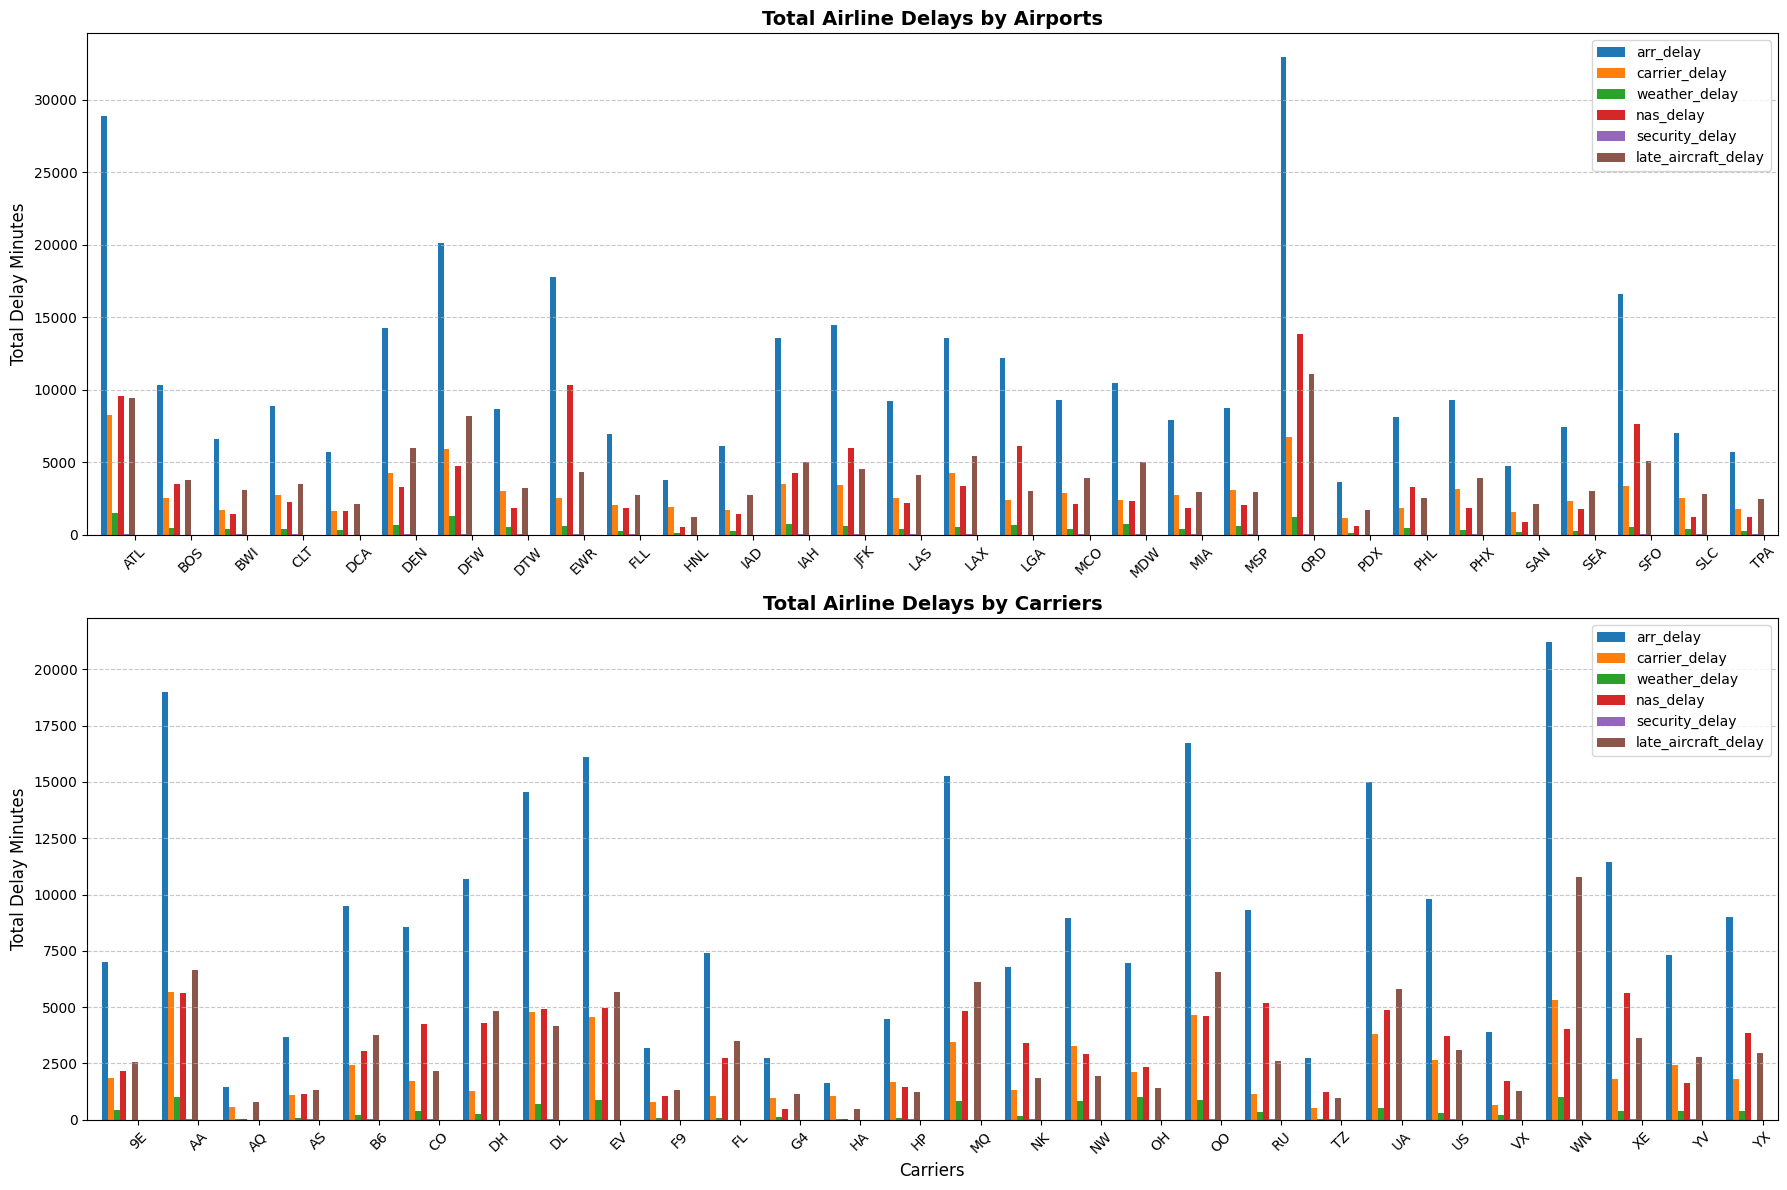

In [71]:
# Group data 
airport_name_delays = flight_data_df.groupby("airport")[delay_columns].mean()
carrier_name_delays = flight_data_df.groupby("carrier")[delay_columns].mean()

# Create subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=False)

# Plot airline delays by airport with spacing
airport_name_delays.plot(kind="bar", ax=axes[0], width=0.6, position=1)
axes[0].set_title("Total Airline Delays by Airports", fontsize=14, fontweight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Total Delay Minutes", fontsize=12)
axes[0].grid(axis='y', linestyle="--", alpha=0.7)
axes[0].set_xticks(range(len(airport_name_delays.index)))  # Set correct x-ticks with spacing
axes[0].set_xticklabels(airport_name_delays.index, rotation=45, ha="center")

# Plot airline delays by carrier with spacing
carrier_name_delays.plot(kind="bar", ax=axes[1], width=0.6, position=1)
axes[1].set_title("Total Airline Delays by Carriers", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Carriers", fontsize=12)
axes[1].set_ylabel("Total Delay Minutes", fontsize=12)
axes[1].grid(axis='y', linestyle="--", alpha=0.7)
axes[1].set_xticks(range(len(carrier_name_delays.index)))  # Set correct x-ticks with spacing
axes[1].set_xticklabels(carrier_name_delays.index, rotation=45, ha="center")

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything neatly
plt.tight_layout()
plt.show()

This figure consists of two bar charts, each representing the total delay minutes for different causes of airline delays, grouped by airports (top) and carriers (bottom).

Some observations from both the graphs are summarised as follows:

1. Total Airline Delays by Airports: Xaxis- Aiport Code, Yaxis- Total Delay minutes
    
    *  Arrival Delays (Blue Bars) are the largest component of total delays at most airports.
    * Airports like ATL, ORD, MSP have significantly high delays, possibly due to high traffic and congestion.
    * Carrier delays (Orange), NAS delays (Red), and late aircraft delays (Brown) contribute significantly but vary by airport.
    * Weather delays (Green) and Security delays (Purple) are generally smaller but present in some cases.

2. Total Airline Delays by Carriers: Xaxis- Carrier Code, Yaxis- Total Delay minutes
    
    * Arrival Delays (Blue) dominate across most airlines.
    * Some airlines (e.g., DL, UA, AA, and WN) experience significantly high delays, likely due to their high flight volume.
    * Late Aircraft Delays (Brown) are another major cause, indicating that delays cascade across flights.
    * Smaller airlines (right side) generally have lower total delays, likely due to fewer operations.

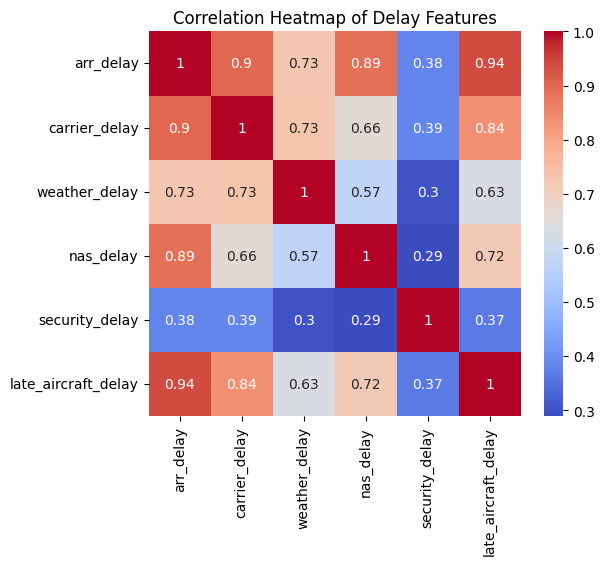

In [54]:
plt.figure(figsize=(6, 5))
sns.heatmap(flight_data_df[delay_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Delay Features')
plt.show()

This heatmap visualizes the correlation coefficients between different types of airline delays. Red being closer to 1.0 represents Strong positive correlation and Blue being closer to 0.0 or negative represents weak or no correlationThe color intensity indicates the strength of the correlation. Some of the observations are as follows:

1. **Arrival Delay & Late Aircraft Delay (0.94)**: Flights arriving late strongly correlate with previous flights arriving late. Late aircraft delays cause ripple effects on future flights.
2. **Arrival Delay & Carrier Delay (0.90)**: Airline-related delays (maintenance, crew issues) significantly impact overall arrival delays.
3. **Carrier Delay & Weather Delay (0.73)**: Weather issues affect airline operations, leading to carrier-related delays.
4. **Arrival Delay & NAS Delay (0.89)**: National Airspace System (NAS) delays (congestion, air traffic control issues) strongly contribute to overall arrival delays.
5. **Carrier Delay & Late Aircraft Delay (0.84)**: When one flight is late due to airline operations, the next flight is also affected.
6. **Weather Delay & Late Aircraft Delay (0.63)** : Bad weather can cause cascading effects, leading to late aircraft delays.
7. **NAS Delay & Late Aircraft Delay (0.72)**: Air traffic congestion often results in late aircraft arriving at the gate.
8. **Security Delay vs. Other Delays (0.29 - 0.39)**: Security delays are relatively independent from other types of delays.

Now we focus on Delay Count feature analysis.

## Delay Count Feature Analysis

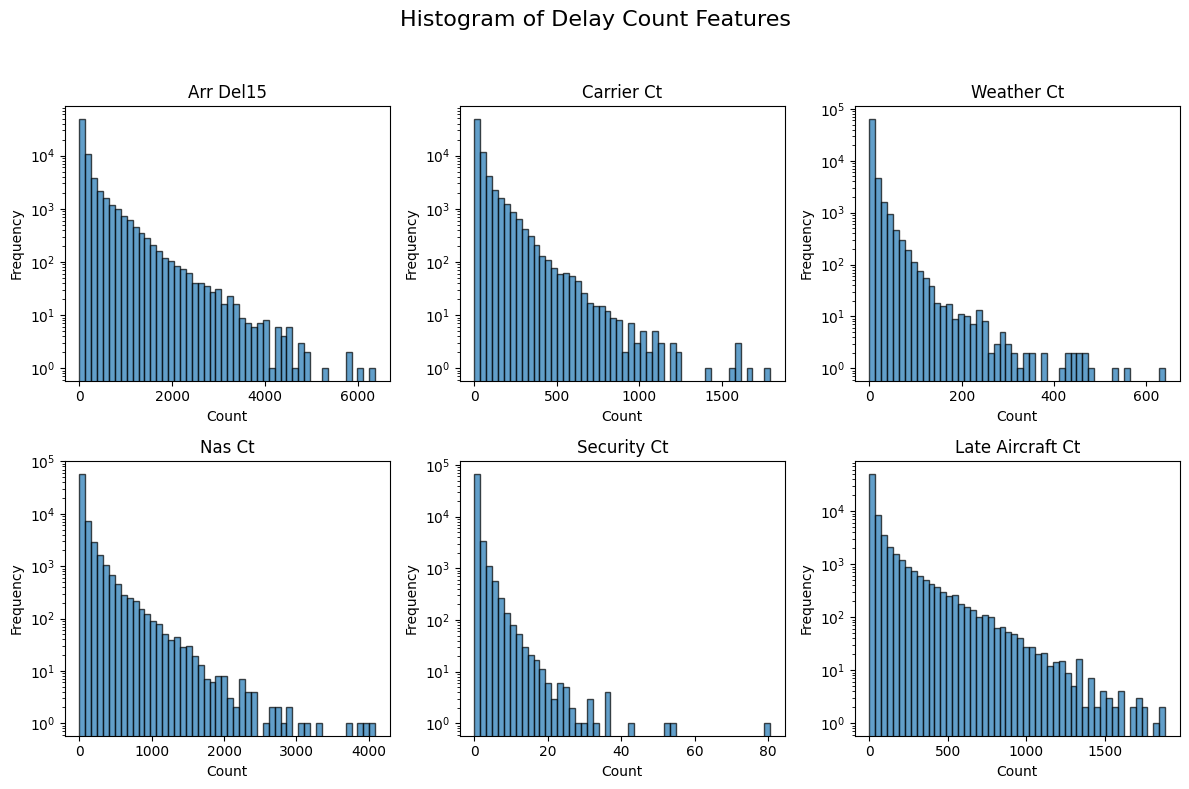

In [73]:
#Count Analysis

# Select delay-related columns for visualization
delay_count_columns = ["arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct"]

# Plot histograms for delay distributions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(delay_count_columns):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    ax.hist(flight_data_df[col], bins=50, edgecolor='black', alpha=0.7)
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel("Count")
    ax.set_ylabel("Frequency")
    ax.set_yscale("log")  # Log scale to handle skewness

# Add main title
fig.suptitle("Histogram of Delay Count Features", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title
plt.show()

This figure consists of six histograms, each representing the distribution of counts for different categories of airline delays. The logarithmic y-axis helps visualize the data, as delay counts tend to be right-skewed similar to the delay features we previously analysed, meaning most values are small but a few are extremely large. Some other key observations are as follows:

1. Arr Del15 (Arrival Delays of 15+ Minutes): Most flights have fewer than 1,000 delays, but some airports or airlines have more than 6,000 delays.The long tail shows that a few cases experience significantly more delays than the average.

2. Carrier Ct (Carrier-Related Delays): Most values are concentrated near 0–500 delays. Some airlines experience over 1,500 carrier-related delays, likely due to operational inefficiencies such as maintenance or crew shortages.

3. Weather Ct (Weather-Related Delays): Weather-related delays tend to be less frequent compared to other delay types. Most values are below 200, but a few cases reach over 600 delays, likely during extreme weather events.

4. NAS Ct (National Aviation System Delays): NAS delays are generally higher than weather delays, often between 0–1,000 delays. A few instances reach over 4,000 delays, possibly due to air traffic congestion and airport inefficiencies.

5. Security Ct (Security Delays): The least frequent type of delay, with most values below 20. A few cases reach above 80, possibly due to security incidents or increased screening measures.

6. Late Aircraft Ct (Late Aircraft Delays): A significant contributor to flight disruptions, with many values in the 500–1,500 range. A few cases exceed 2,000 delays, showing how late flights cause cascading delays across the system.

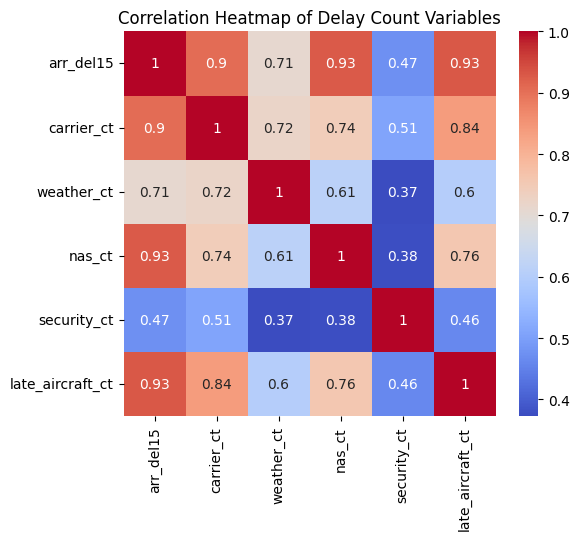

In [58]:
plt.figure(figsize=(6, 5))
sns.heatmap(flight_data_df[delay_count_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Delay Count Variables')
plt.show()

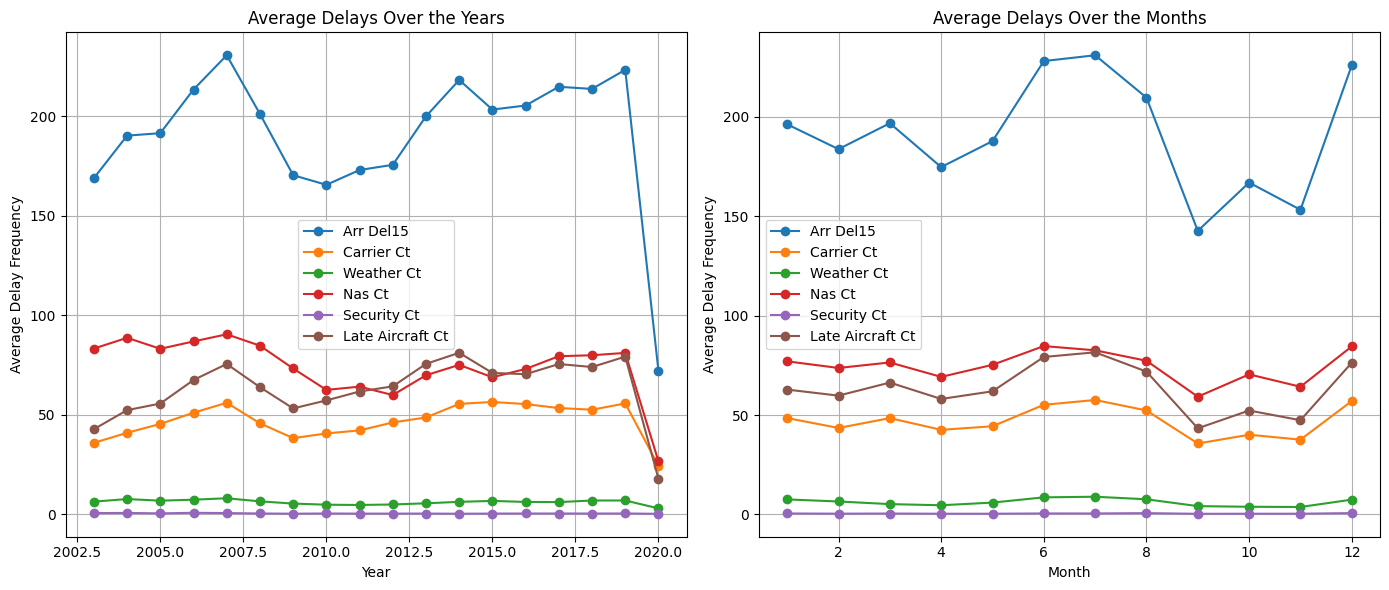

In [67]:
# Group data by year and calculate mean delays
yearly_delays = flight_data_df.groupby("year")[delay_count_columns].mean()

# Group data by year and calculate mean delays
monthly_delays = flight_data_df.groupby("month")[delay_count_columns].mean()

# Create subplots for year and month trends
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot trends over year
for col in delay_count_columns:
    axes[0].plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[0].set_title("Average Delays Over the Years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average Delay Frequency")
axes[0].legend()
axes[0].grid(True)

# Plot trends over month
for col in delay_count_columns:
    axes[1].plot(monthly_delays.index, monthly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[1].set_title("Average Delays Over the Months")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Average Delay Frequency")
axes[1].legend()
axes[1].grid(True)

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the combined figure
plt.tight_layout()
plt.show()

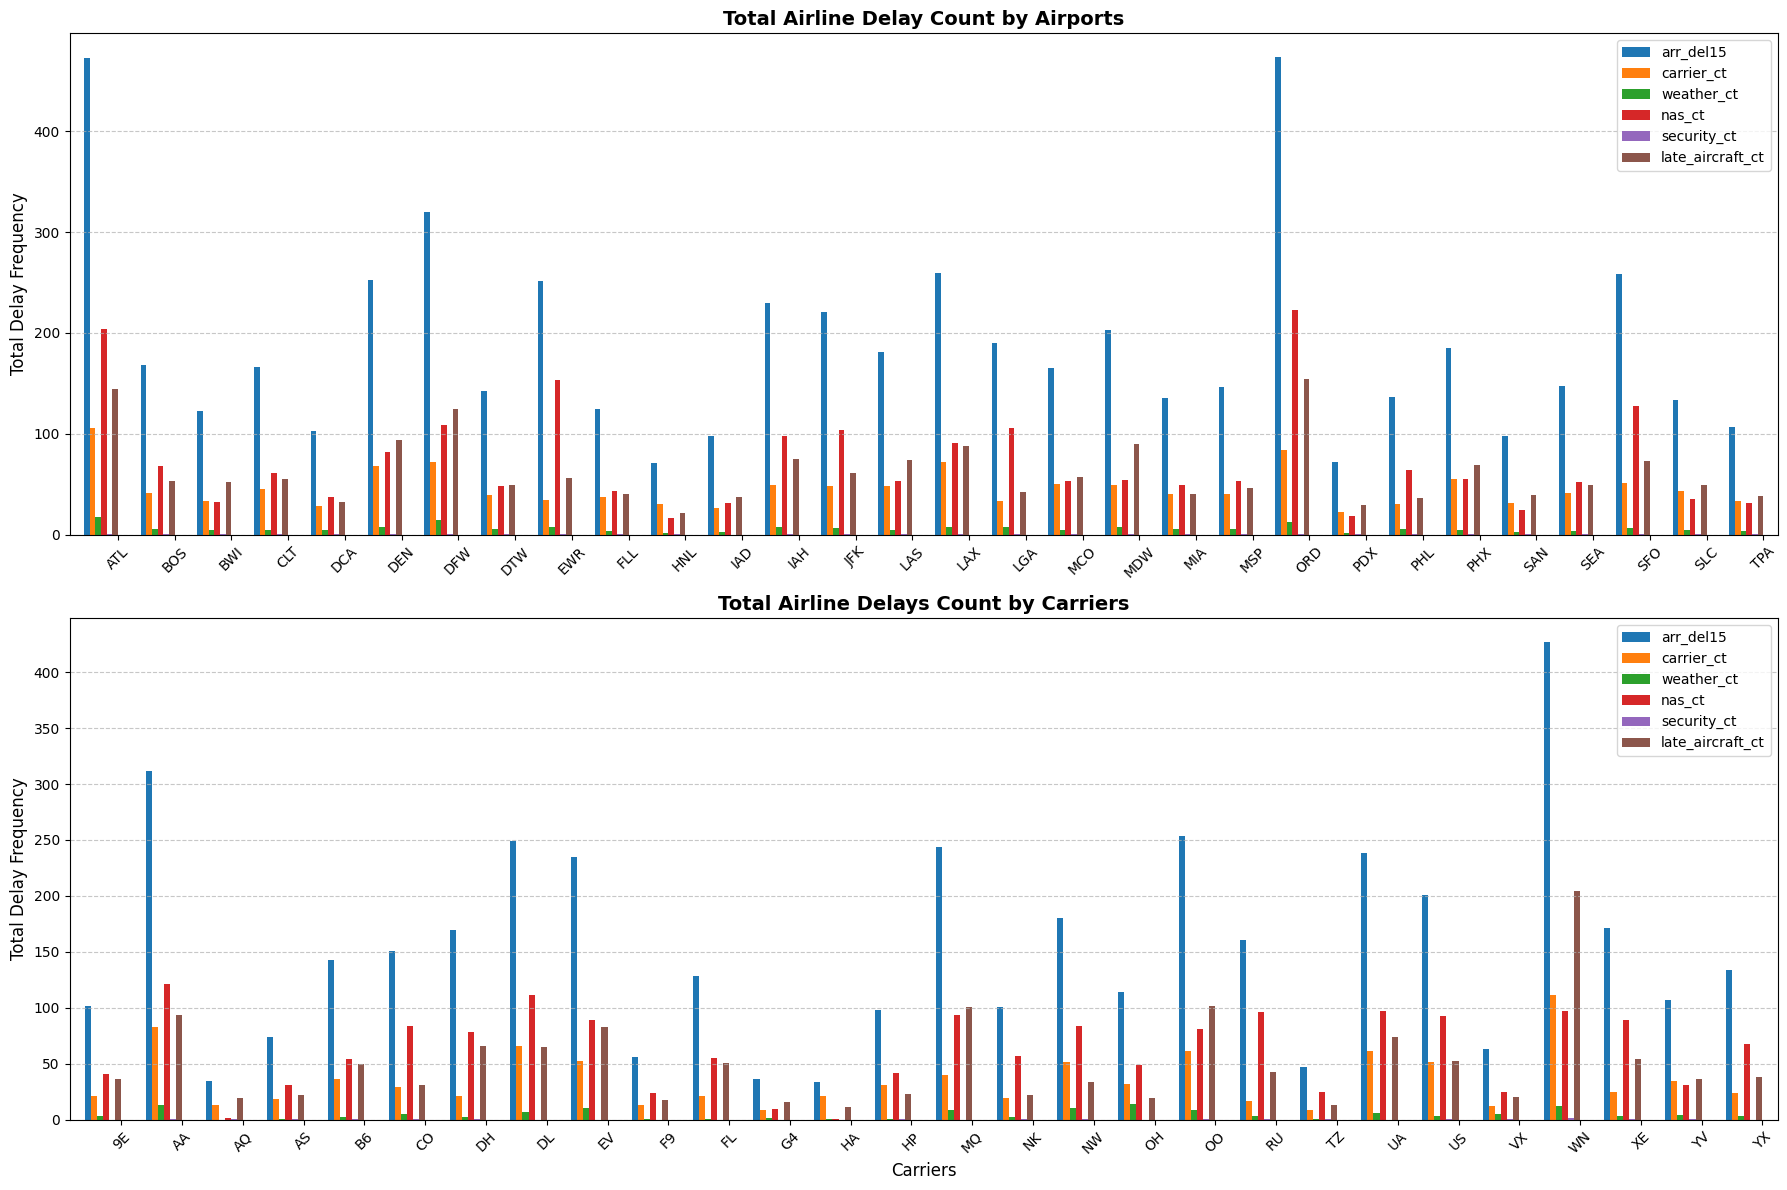

In [72]:
# Group data 
airport_name_delay_count = flight_data_df.groupby("airport")[delay_count_columns].mean()
carrier_name_delay_count = flight_data_df.groupby("carrier")[delay_count_columns].mean()

# Create subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=False)

# Plot airline delays by airport with spacing
airport_name_delay_count.plot(kind="bar", ax=axes[0], width=0.6, position=1)
axes[0].set_title("Total Airline Delay Count by Airports", fontsize=14, fontweight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Total Delay Frequency", fontsize=12)
axes[0].grid(axis='y', linestyle="--", alpha=0.7)
axes[0].set_xticks(range(len(airport_name_delays.index)))  # Set correct x-ticks with spacing
axes[0].set_xticklabels(airport_name_delays.index, rotation=45, ha="center")

# Plot airline delays by carrier with spacing
carrier_name_delay_count.plot(kind="bar", ax=axes[1], width=0.6, position=1)
axes[1].set_title("Total Airline Delays Count by Carriers", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Carriers", fontsize=12)
axes[1].set_ylabel("Total Delay Frequency", fontsize=12)
axes[1].grid(axis='y', linestyle="--", alpha=0.7)
axes[1].set_xticks(range(len(carrier_name_delays.index)))  # Set correct x-ticks with spacing
axes[1].set_xticklabels(carrier_name_delays.index, rotation=45, ha="center")

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything neatly
plt.tight_layout()
plt.show()

## Operational Feature Analysis

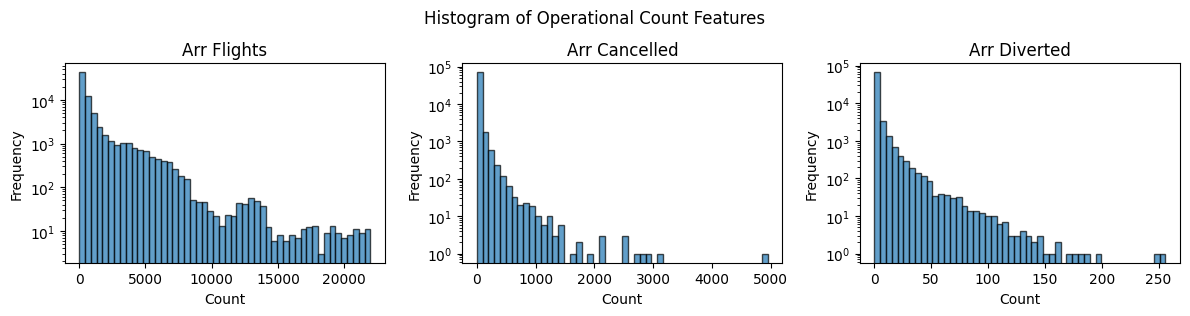

In [78]:
#Arrival, cancellation and Diversion feature analysis

# Select operational-related columns for visualization
operational_count_columns = ["arr_flights", "arr_cancelled", "arr_diverted"]

# Plot histograms for count-related variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(operational_count_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(flight_data_df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    plt.title(col.replace("_", " ").title())
    plt.xlabel("Count")
    plt.ylabel("Frequency")
    plt.yscale("log")  # Log scale to handle skewness

plt.suptitle("Histogram of Operational Count Features")
plt.tight_layout()
plt.show()

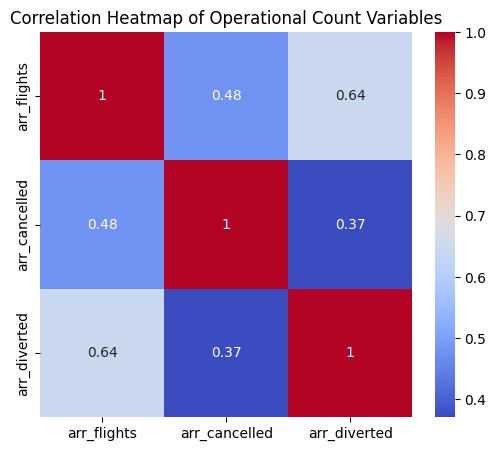

In [66]:
plt.figure(figsize=(6, 5))
sns.heatmap(flight_data_df[operational_count_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Operational Count Variables')
plt.show()

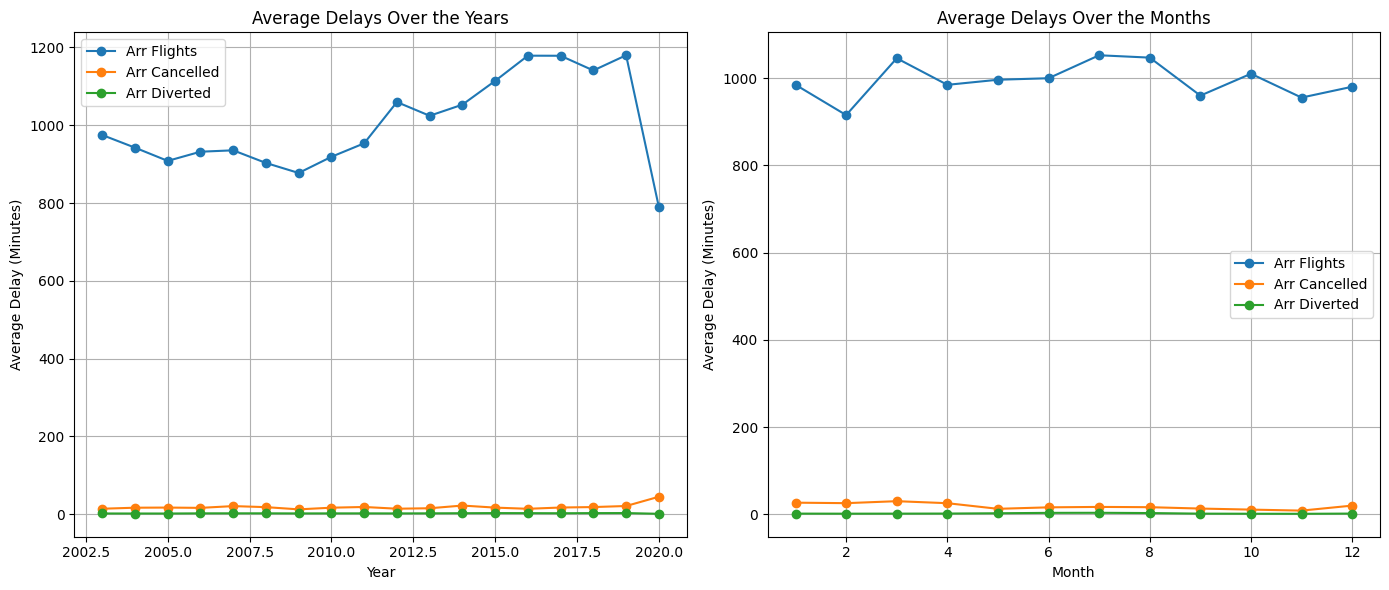

In [79]:
# Group data by year and month
yearly_delays = flight_data_df.groupby("year")[operational_count_columns].mean()
monthly_delays = flight_data_df.groupby("month")[operational_count_columns].mean()

# Create subplots for year and month trends
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot trends over year
for col in operational_count_columns:
    axes[0].plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[0].set_title("Average Delays Over the Years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average Delay (Minutes)")
axes[0].legend()
axes[0].grid(True)

# Plot trends over month
for col in operational_count_columns:
    axes[1].plot(monthly_delays.index, monthly_delays[col], marker='o', label=col.replace("_", " ").title())

axes[1].set_title("Average Delays Over the Months")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Average Delay (Minutes)")
axes[1].legend()
axes[1].grid(True)

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the combined figure
plt.tight_layout()
plt.show()

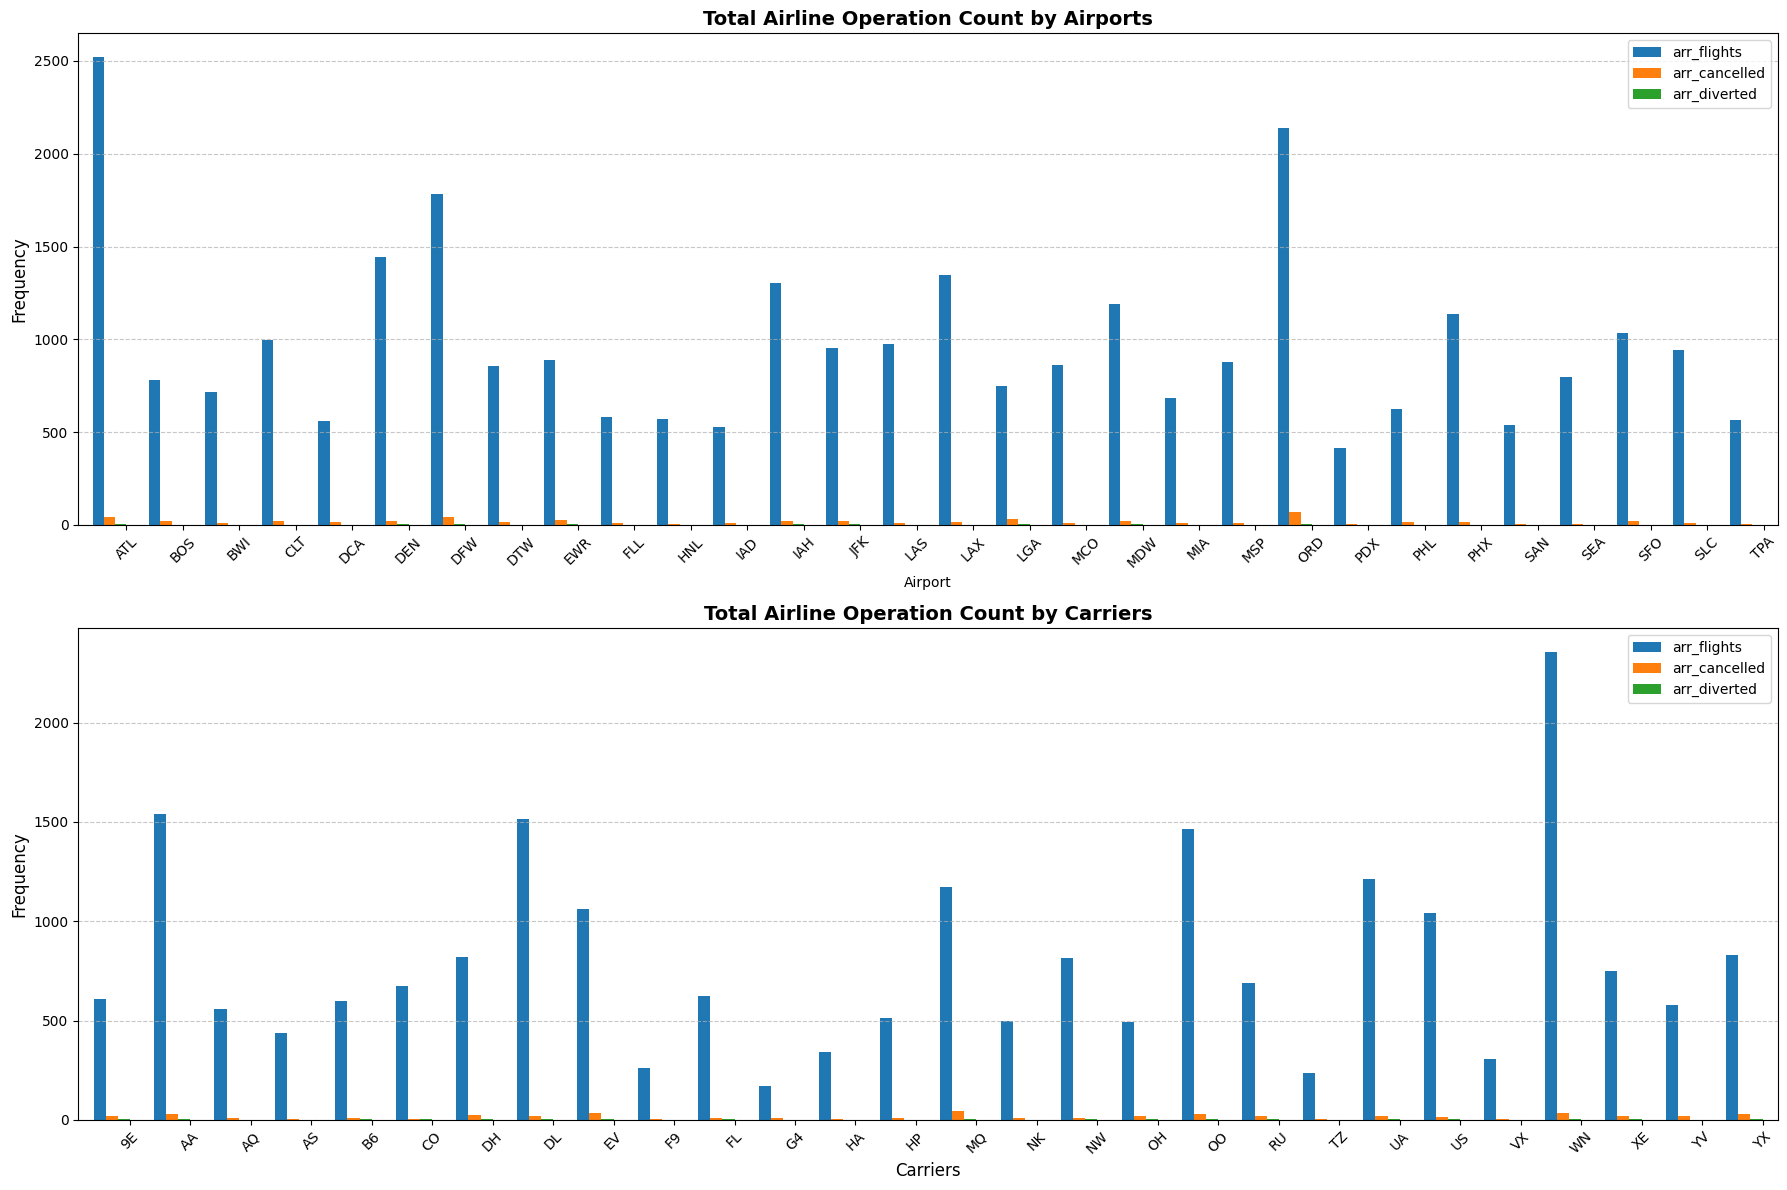

In [83]:
# Group data
airport_name_op_count = flight_data_df.groupby("airport")[operational_count_columns].mean()
carrier_name_op_count = flight_data_df.groupby("carrier")[operational_count_columns].mean()

# Create subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=False)

# Plot airline delays by airport with spacing
airport_name_op_count.plot(kind="bar", ax=axes[0], width=0.6, position=1)
axes[0].set_title("Total Airline Operation Count by Airports", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Airport")
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].grid(axis='y', linestyle="--", alpha=0.7)
axes[0].set_xticks(range(len(airport_name_delays.index)))  # Set correct x-ticks with spacing
axes[0].set_xticklabels(airport_name_delays.index, rotation=45, ha="center")

# Plot airline delays by carrier with spacing
carrier_name_op_count.plot(kind="bar", ax=axes[1], width=0.6, position=1)
axes[1].set_title("Total Airline Operation Count by Carriers", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Carriers", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].grid(axis='y', linestyle="--", alpha=0.7)
axes[1].set_xticks(range(len(carrier_name_delays.index)))  # Set correct x-ticks with spacing
axes[1].set_xticklabels(carrier_name_delays.index, rotation=45, ha="center")

# # Remove individual subplot legends
# axes[0].legend().remove()
# axes[1].legend().remove()

# # Add a single legend for both plots
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything neatly
plt.tight_layout()
plt.show()

In [37]:
#top 10 busiest Airport-Carrier
# Aggregate total flights by (airport, carrier) combination
busiest_airport_carrier = flight_data_df.groupby(["airport", "carrier"])["arr_flights"].sum()

# Get the top 10 busiest airport-carrier combinations
busiest_airport_carrier = busiest_airport_carrier.sort_values(ascending=False).head(10)

#top 10 Airport-Carrier with highest delays
# Aggregate total flights by (airport, carrier) combination
delay_airport_carrier = flight_data_df.groupby(["airport", "carrier"])["arr_del15"].sum()

# Get the top 10 busiest airport-carrier combinations
delay_airport_carrier = delay_airport_carrier.sort_values(ascending=False).head(10)

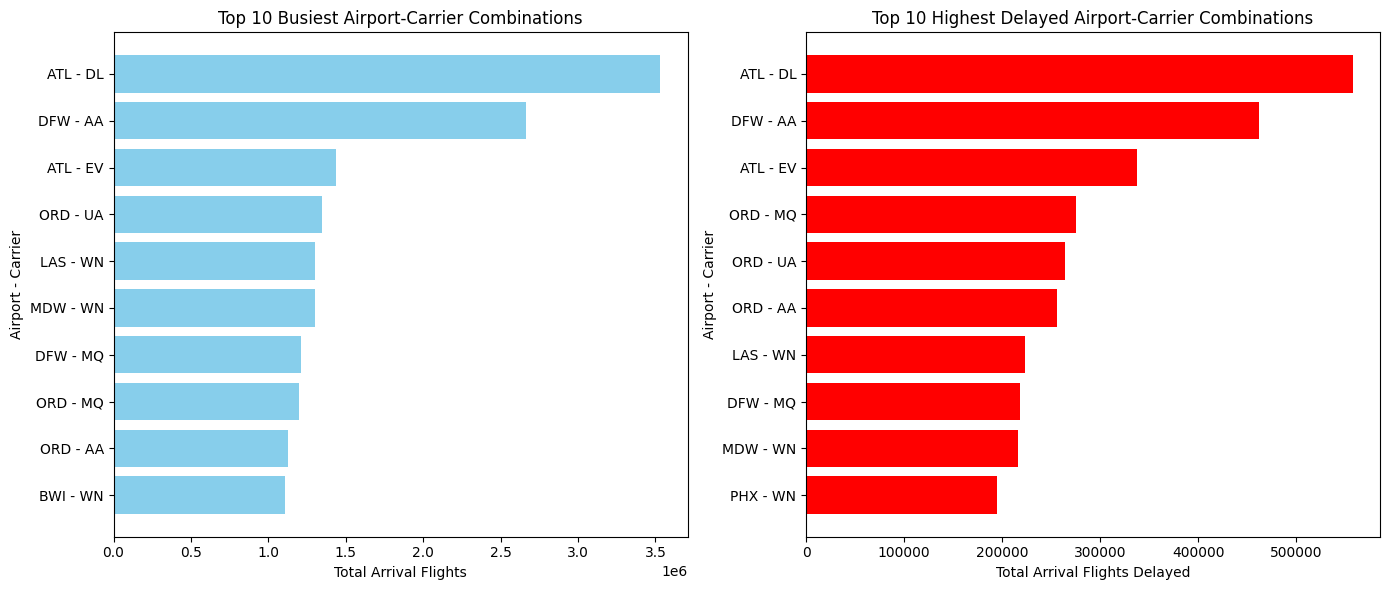

In [38]:
#Convert to DataFrame for plotting
busiest_airport_carrier_df = busiest_airport_carrier.reset_index()

#Convert to DataFrame for plotting
delay_airport_carrier_df = delay_airport_carrier.reset_index()

# Combine both graphs into a single figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the busiest airport-carrier combinations
axes[0].barh(
    busiest_airport_carrier_df["airport"] + " - " + busiest_airport_carrier_df["carrier"],
    busiest_airport_carrier_df["arr_flights"],
    color="skyblue",
)
axes[0].set_xlabel("Total Arrival Flights")
axes[0].set_ylabel("Airport - Carrier")
axes[0].set_title("Top 10 Busiest Airport-Carrier Combinations")
axes[0].invert_yaxis()  # Invert y-axis

# Plot the highest delayed airport-carrier combinations
axes[1].barh(
    delay_airport_carrier_df["airport"] + " - " + delay_airport_carrier_df["carrier"],
    delay_airport_carrier_df["arr_del15"],
    color="red",
)
axes[1].set_xlabel("Total Arrival Flights Delayed")
axes[1].set_ylabel("Airport - Carrier")
axes[1].set_title("Top 10 Highest Delayed Airport-Carrier Combinations")
axes[1].invert_yaxis()  # Invert y-axis

# Adjust layout and show the combined figure
plt.tight_layout()
plt.show()